## Otimização de projeto em engenharia mecânica

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Função, gradiente e hessiana

* $f(x)$ - função a ser minimizada
* $\nabla f(x)$ - gradiente de $f(x)$
* $\nabla^2 f(x)$ - hessiana de $f(x)$

In [2]:
def func(x0):
    x1, x2 = x0
    return((1 - x1)**2 + 100* (x2 - x1**2)**2)

def grad(x0):
    x1, x2 = x0
    return(np.array([400*x1**3 - 400*x1*x2 +\
                     2*x1 - 2, 200*x2 -\
                     200*x1**2]).reshape((2,1)))

def hess(x0):
    x1, x2 = x0
    return(np.array([1200*x1**2 - 400*x2 + 2,
                    -400*x1, -400*x1, 200]).reshape((2,2)))

#### Função teste

* Rosenbrock's banana function

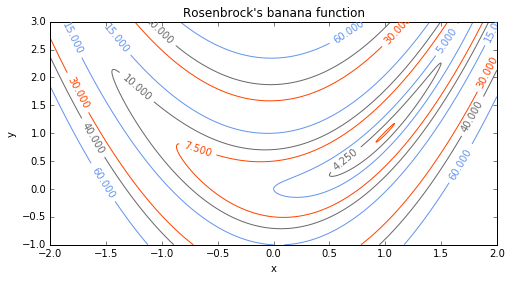

In [3]:
x = np.linspace(-2,2,1000)
y = np.linspace(-1,3,1000)
x1,x2 = np.meshgrid(x,y)
Z = 10*x1**4 - x2*20*x1**2 +\
           10*x2**2 + x1**2 -2*x1 + 5

levels = [4.007,4.25,5,7.5,10,15,30,40,60]
cors = ('#FF4500','#696969','#6495ED')*3
plt.figure(figsize=(8,4))
cp = plt.contour(x1,x2,Z,levels,colors=cors)
plt.clabel(cp, inline=True,fontsize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Rosenbrock's banana function")

In [4]:
x0 = (1,1)
print(func(x0),'\n',grad(x0),'\n',hess(x0))

0 
 [[0]
 [0]] 
 [[ 802 -400]
 [-400  200]]


In [5]:
np.matmul(grad(x0).T,hess(x0))

array([[0, 0]])

In [6]:
np.linalg.eigvals(hess(x0))

array([  1.00160064e+03,   3.99360767e-01])